## Import required libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
os.chdir('/home/student/Desktop/Traffic_Signs_WebApp-master/Traffic_Signs_WebApp-master')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

2024-12-02 08:37:19.266390: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-02 08:37:26.656948: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-02 08:37:32.656629: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733108857.428885   11755 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733108858.682886   11755 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-02 08:37:44.173124: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
#pip install opencv-python

## Store data, labels in the list

In [3]:
data = []
labels = []
# We have 43 Classes
classes = 43
cur_path = os.getcwd()

In [4]:
cur_path

'/home/student/Desktop/Traffic_Signs_WebApp-master/Traffic_Signs_WebApp-master'

## Preprocess the images

In [5]:
import os
import numpy as np
from PIL import Image


data = []  # Initialize as a list
labels = []  # Initialize as a list

for i in range(classes):
    path = os.path.join(cur_path, 'train', str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image_path = os.path.join(path, a)
            image = Image.open(image_path)
            image = image.resize((30, 30))  # Resize to 30x30
            image = np.array(image)  # Convert to NumPy array
            data.append(image)  # Append image data to list
            labels.append(i)    # Append label to list
        except Exception as e:
            print(f"Error processing image {a}: {e}")

# Convert lists to NumPy arrays after appending
data = np.array(data)
labels = np.array(labels)

print(f"Data shape: {data.shape}")
print(f"Labels shape: {labels.shape}")



Data shape: (39209, 30, 30, 3)
Labels shape: (39209,)


## Converting lists into numpy arrays

In [6]:
data = np.array(data)
labels = np.array(labels)

## Save Labels & Data for future use

In [7]:
# os.mkdir('training')

np.save('./training/data',data)
np.save('./training/target',labels)

## Load data & Labels

In [8]:
data=np.load('./training/data.npy')
labels=np.load('./training/target.npy')

In [9]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [11]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


## Convert labels to onehot encoding

In [12]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

## Now it's time to build the model

In [13]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

/home/student/anaconda3/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-12-02 08:51:23.592846: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [14]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
epochs = 20

In [16]:
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

2024-12-02 08:51:38.292626: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 84690900 exceeds 10% of free system memory.


Epoch 1/20


2024-12-02 08:51:53.122189: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 13095936 exceeds 10% of free system memory.
2024-12-02 08:51:53.185894: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 13095936 exceeds 10% of free system memory.
2024-12-02 08:51:53.252529: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 15676416 exceeds 10% of free system memory.
2024-12-02 08:51:53.252895: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 15676416 exceeds 10% of free system memory.


981/981 ━━━━━━━━━━━━━━━━━━━━ 239s 229ms/step - accuracy: 0.2907 - loss: 3.2732 - val_accuracy: 0.7916 - val_loss: 0.7825
Epoch 2/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 214s 218ms/step - accuracy: 0.6926 - loss: 1.0124 - val_accuracy: 0.8952 - val_loss: 0.3947
Epoch 3/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 270s 226ms/step - accuracy: 0.7750 - loss: 0.7345 - val_accuracy: 0.9223 - val_loss: 0.2862
Epoch 4/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 211s 215ms/step - accuracy: 0.8169 - loss: 0.6175 - val_accuracy: 0.9480 - val_loss: 0.1961
Epoch 5/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 224s 228ms/step - accuracy: 0.8343 - loss: 0.5369 - val_accuracy: 0.9475 - val_loss: 0.1918
Epoch 6/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 266s 232ms/step - accuracy: 0.8459 - loss: 0.5031 - val_accuracy: 0.9569 - val_loss: 0.1571
Epoch 7/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 221s 225ms/step - accuracy: 0.8525 - loss: 0.4815 - val_accuracy: 0.9489 - val_loss: 0.1687
Epoch 8/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 266s 230ms/step - accuracy: 0.8566 - loss: 0.46

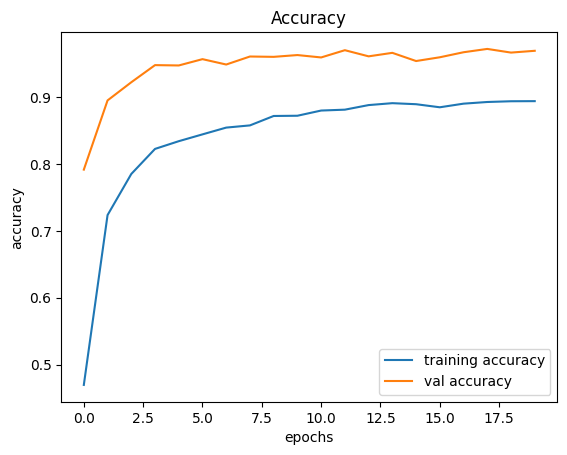

In [17]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

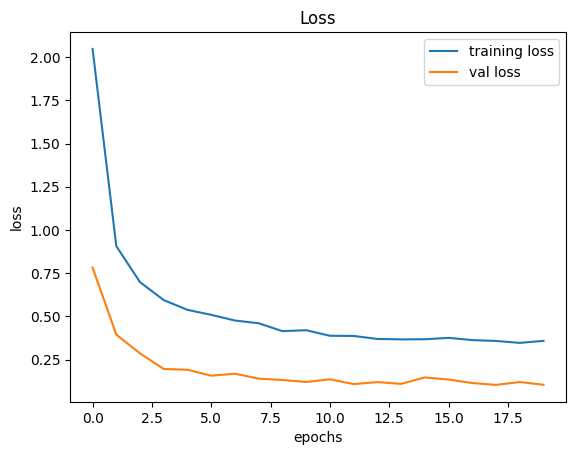

In [18]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## LEt's do testing on Test data

In [19]:
def testing(testcsv, base_path='/home/student/Desktop/Traffic_Signs_WebApp-master/Traffic_Signs_WebApp-master/'):
    # Read CSV file containing image paths and labels
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data = []
    
    for img in imgs:
        # Construct the full path by joining base path and the relative image path
        img_path = os.path.join(base_path, 'data', img)  # Make sure 'data' folder is included
        try:
            image = Image.open(img_path).convert('RGB')
            image = image.resize((30, 30))  # Resize image to 30x30 pixels
            data.append(np.array(image))  # Append the image to the data list
        except FileNotFoundError:
            print(f"File not found: {img_path}")  # Print error if file is not found
    
    X_test = np.array(data)  # Convert data to a numpy array
    return X_test, label  # Return the test data and labels

# Example of using the testing function
X_test, label = testing('/home/student/Desktop/Traffic_Signs_WebApp-master/Traffic_Signs_WebApp-master/data/Test.csv')

In [20]:
def testing(testcsv, base_path='/home/student/Desktop/Traffic_Signs_WebApp-master/Traffic_Signs_WebApp-master/'):
    # Read CSV file containing image paths and labels
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data = []
    
    for img in imgs:
        # Construct the full path by joining base path and the relative image path
        img_path = os.path.join(base_path, 'data', img)  # Make sure 'data' folder is included
        try:
            image = Image.open(img_path).convert('RGB')
            image = image.resize((30, 30))  # Resize image to 30x30 pixels
            data.append(np.array(image))  # Append the image to the data list
        except FileNotFoundError:
            print(f"File not found: {img_path}")  # Print error if file is not found
    
    X_test = np.array(data)  # Convert data to a numpy array
    return X_test, label  # Return the test data and labels

# Example of using the testing function
X_test, label = testing('/home/student/Desktop/Traffic_Signs_WebApp-master/Traffic_Signs_WebApp-master/data/Test.csv')

In [21]:
# Get predictions from the model
pred_probs = model.predict(X_test)

# Get the class with the highest probability for each test sample
Y_pred = np.argmax(pred_probs, axis=1)

print(Y_pred)


395/395 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step
[16  1 38 ...  5  7 10]


## Accuracy with the test data

In [22]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

0.922486144101346


## Save the model

In [23]:
model.save("./training/TSR.h5")

## Load the Model

In [24]:
import os
os.chdir(r'/home/student/Desktop/Traffic_Signs_WebApp-master/Traffic_Signs_WebApp-master')
from keras.models import load_model
model = load_model(r'./training/TSR.h5')

In [25]:
# Classes of trafic signs
classes = {
    0: 'Speed limit (20km/h)',
    1: 'Speed limit (30km/h)',
    2: 'Speed limit (50km/h)',
    3: 'Speed limit (60km/h)',
    4: 'Speed limit (70km/h)',
    5: 'Speed limit (80km/h)',
    6: 'End of speed limit (80km/h)',
    7: 'Speed limit (100km/h)',
    8: 'Speed limit (120km/h)',
    9: 'No passing',
    10: 'No passing vehicles over 3.5 tons',
    11: 'Right-of-way at intersection',
    12: 'Priority road',
    13: 'Yield',
    14: 'Stop',
    15: 'No vehicles',
    16: 'Vehicles > 3.5 tons prohibited',
    17: 'No entry',
    18: 'General caution',
    19: 'Dangerous curve left',
    20: 'Dangerous curve right',
    21: 'Double curve',
    22: 'Bumpy road',
    23: 'Slippery road',
    24: 'Road narrows on the right',
    25: 'Road work',
    26: 'Traffic signals',
    27: 'Pedestrians',
    28: 'Children crossing',
    29: 'Bicycles crossing',
    30: 'Beware of ice/snow',
    31: 'Wild animals crossing',
    32: 'End of speed and passing limits',
    33: 'Turn right ahead',
    34: 'Turn left ahead',
    35: 'Ahead only',
    36: 'Go straight or right',
    37: 'Go straight or left',
    38: 'Keep right',
    39: 'Keep left',
    40: 'Roundabout mandatory',
    41: 'End of no passing',
    42: 'End of no passing vehicles > 3.5 tons'
}


In [26]:
from keras.models import load_model
import numpy as np
from PIL import Image

# Ensure the model is loaded
model = load_model('/home/student/Desktop/Traffic_Signs_WebApp-master/Traffic_Signs_WebApp-master/training/TSR.h5')

def test_on_img(img):
    data = []
    image = Image.open(img).convert('RGB')  # Ensure the image is in RGB format
    image = image.resize((30, 30))  # Resize image to 30x30 pixels
    data.append(np.array(image))  # Append image to the data list
    X_test = np.array(data)  # Convert the list to a numpy array
    
    # Use model.predict and np.argmax to get the predicted class
    predictions = model.predict(X_test)
    Y_pred = np.argmax(predictions, axis=1)  # Get the index of the max value in predictions
    
    return image, Y_pred


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step
Predicted traffic sign is: Bumpy road


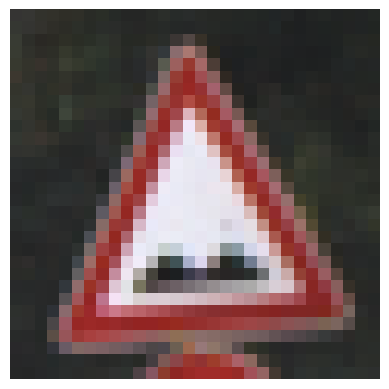

In [27]:
import matplotlib.pyplot as plt

# Test the function with your image path
plot, prediction = test_on_img('/home/student/Desktop/Traffic_Signs_WebApp-master/Traffic_Signs_WebApp-master/data/Test/00500.png')
s = [str(i) for i in prediction]
a = int("".join(s))
print("Predicted traffic sign is:", classes[a])

# Display the image
plt.imshow(plot)
plt.axis('off')  # Remove axes
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted traffic sign is: Speed limit (100km/h)


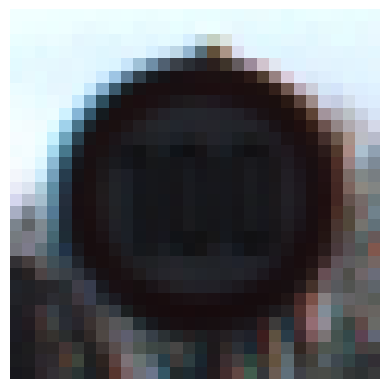

In [28]:
import matplotlib.pyplot as plt

# Test the function with your image path
plot, prediction = test_on_img('/home/student/Desktop/Traffic_Signs_WebApp-master/Traffic_Signs_WebApp-master/data/Test/00150.png')

# Extract the predicted class from the array
predicted_class = prediction[0]
print("Predicted traffic sign is:", classes[predicted_class])

# Display the image
plt.imshow(plot)
plt.axis('off')  # Remove axes for cleaner display
plt.show()
